# ALURA IMERSÃO DADOS

## Aula 3 - Gráficos, Time Series e Análise Exploratória

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)

In [3]:
df[["Moeda", "Valor_Anuncio", "Tipo"]] = df["Valor"].str.split(expand=True)

In [4]:
df_vendas = df[df["Tipo"].isnull()]

In [5]:
df_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_Anuncio, Length: 9156, dtype: float64

In [6]:
df_vendas["Valor_Anuncio"] = df_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [8]:
df_vendas["Preco_metro"]=df_vendas["Valor_Anuncio"]/df_vendas["Metragem"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
por_bairro = df_vendas.groupby("Bairro")
por_bairro.mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [10]:
df_vendas.groupby("Bairro").sum()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [11]:
df_bairros = df_vendas.groupby("Bairro").sum()
df_bairros

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [12]:
df_bairros["Valor_m2_bairro"]=df_bairros["Valor_Anuncio"]/df_bairros["Metragem"]
df_bairros

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [13]:
df_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo,Preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,5121.95


In [14]:
top_bairros = df_vendas["Bairro"].value_counts()[0:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [15]:
df_bairros.reset_index(inplace=True)
df_bairros

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [16]:
df_bairros.query("Bairro in @top_bairros").sort_values(by="Valor_m2_bairro", ascending=False )

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro,Valor_m2_bairro
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

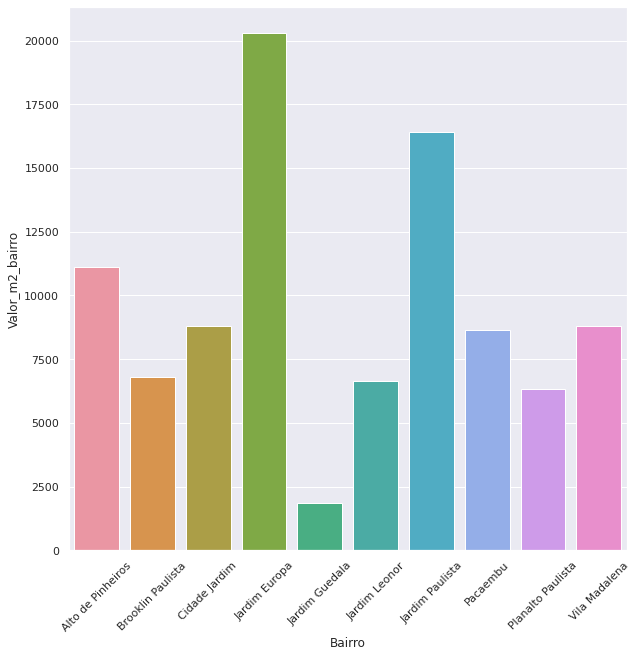

In [17]:
plt.figure(figsize=(10,10))

sns.set_theme(context='notebook', style='darkgrid', palette="rainbow", font='sans-serif', font_scale=1)

ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=df_bairros.query("Bairro in @top_bairros"))

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

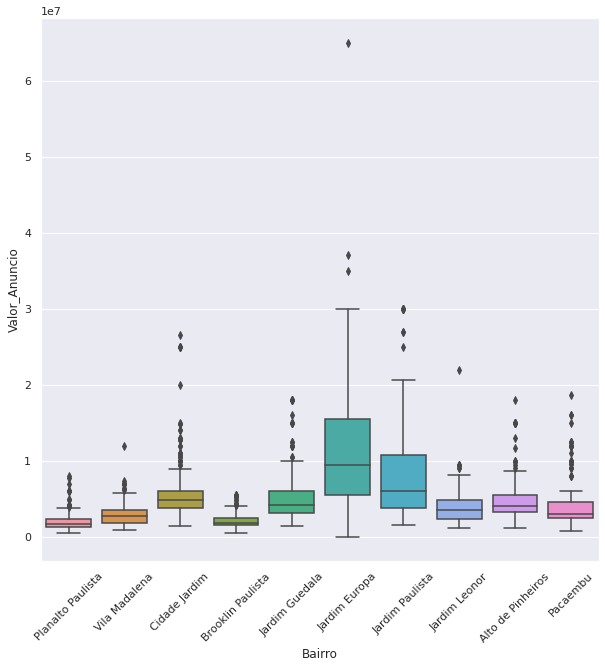

In [18]:
plt.figure(figsize=(10,10))

sns.set_theme(context='notebook', style='darkgrid', palette="rainbow", font='sans-serif', font_scale=1)

ax = sns.boxplot(x="Bairro", y="Valor_Anuncio", data=df_vendas.query("Bairro in @top_bairros"))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

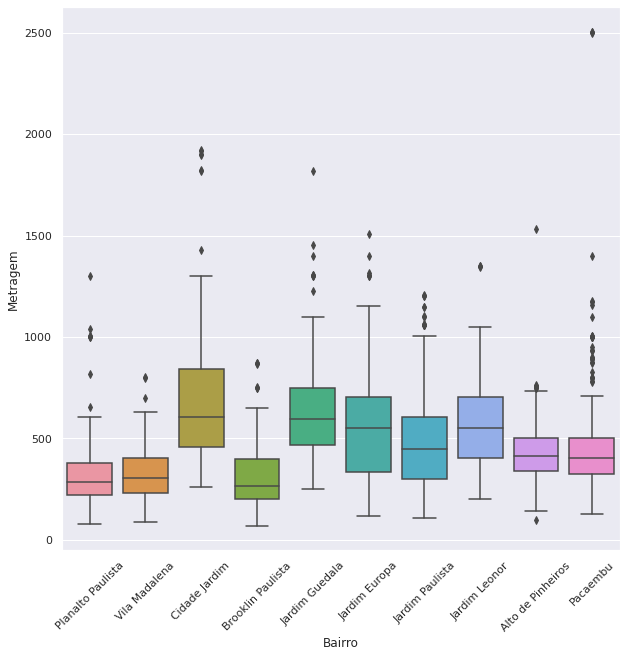

In [19]:
plt.figure(figsize=(10,10))

sns.set_theme(context='notebook', style='darkgrid', palette="rainbow", font='sans-serif', font_scale=1)

ax = sns.boxplot(x="Bairro", y="Metragem", data=df_vendas.query("Bairro in @top_bairros & Metragem < 3000"))
plt.xticks(rotation=45)

In [20]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
df_ibge = pd.read_csv(ibge_url, sep=';', encoding="ISO-8859-1", thousands=".", decimal = ".")

## Desafios desta aula
* Tentar vincular dados do IBGE com os dados de imóveis.

In [21]:
df_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN


In [22]:
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [23]:
df_ibge[["Cod_bairro","Nome_da_micro","Nome_da_RM","Nome_do_municipio", "Nome_do_bairro"]].head()

,Cod_bairro,Nome_da_micro,Nome_da_RM,Nome_do_municipio,Nome_do_bairro
0,3550308000,Sï¿½o Paulo,RM Sï¿½o Paulo,Sï¿½O PAULO,Sï¿½O PAULO (todos os setores)
1,3550308000,Sï¿½o Paulo,RM Sï¿½o Paulo,Sï¿½O PAULO,Sï¿½O PAULO (todos os setores)
2,3550308000,Sï¿½o Paulo,RM Sï¿½o Paulo,Sï¿½O PAULO,Sï¿½O PAULO (todos os setores)
3,3550308000,Sï¿½o Paulo,RM Sï¿½o Paulo,Sï¿½O PAULO,Sï¿½O PAULO (todos os setores)
4,3550308000,Sï¿½o Paulo,RM Sï¿½o Paulo,Sï¿½O PAULO,Sï¿½O PAULO (todos os setores)


In [24]:
df_ibge["V005"]

0        2091,32
1        1650,09
2        1280,43
3        1119,59
4         1416,9
          ...   
18358     772,09
18359      692,5
18360     630,06
18361     597,37
18362     630,13
Name: V005, Length: 18363, dtype: object

* Tratar os outliers e comparar com os resultados.


In [25]:
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,8004.07
std,7856.42,1.05,1.97,2.60,3944208.19,5291.32
min,10.00,1.00,1.00,1.00,13000.00,9.33
25%,168.00,3.00,2.00,2.00,890000.00,4750.00
50%,276.00,3.00,4.00,4.00,1800000.00,6500.00
75%,450.00,4.00,5.00,5.00,3500000.00,9453.78
max,750000.00,16.00,40.00,50.00,65000000.00,80000.00


In [26]:
df_vendas[(df_vendas["Metragem"]<1000) & (df_vendas["Vagas"]<10) & (df_vendas["Banheiros"]<10) & ((df_vendas["Quartos"]<10)) ].describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio,Preco_metro
count,8602.00,8602.00,8602.00,8602.00,8602.00,8602.00
mean,310.12,3.37,3.64,3.56,2648874.39,7847.09
std,188.59,0.96,1.76,1.80,3015879.97,5016.87
min,10.00,1.00,1.00,1.00,13000.00,34.40
25%,160.00,3.00,2.00,2.00,850000.00,4722.22
50%,260.00,3.00,3.00,3.00,1697999.50,6428.57
75%,412.00,4.00,5.00,5.00,3289000.00,9280.74
max,994.00,9.00,9.00,9.00,30000000.00,80000.00


In [27]:
sub_df_vendas =  df_vendas[(df_vendas["Metragem"]<1000) & (df_vendas["Vagas"]<10) & (df_vendas["Banheiros"]<10) & ((df_vendas["Quartos"]<10)) ]

In [28]:
sub_df_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo,Preco_metro
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1980000.00,None,4500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,5121.95


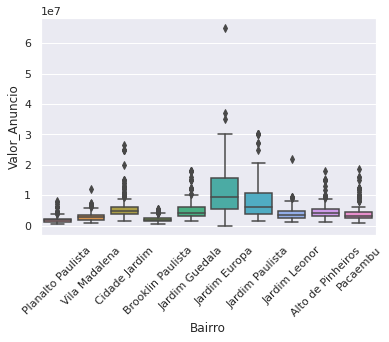

In [30]:
sns.set_theme(context='notebook', style='darkgrid', palette="rainbow", font='sans-serif', font_scale=1)

ax1 = sns.boxplot(x="Bairro", y="Valor_Anuncio", data=df_vendas.query("Bairro in @top_bairros"))

plt.xticks(rotation=45)
plt.show()

* Agrupar por mais de uma categoria e realizar as análises.

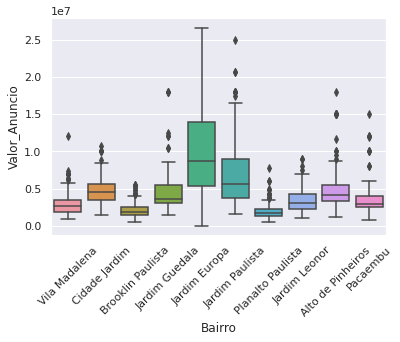

In [31]:
sns.set_theme(context='notebook', style='darkgrid', palette="rainbow", font='sans-serif', font_scale=1)

axs2 = sns.boxplot(x="Bairro", y="Valor_Anuncio", data=sub_df_vendas.query("Bairro in @top_bairros"))

plt.xticks(rotation=45)
plt.show()